## Aim of the work     : Constructing a complete list of all artists appearing in the dictionary. Then using Counter function count how many times each artist appears. Filtering out those artists that appear fewer than 100 times, and then sorting the remaining from the most popular to least popular.

In [72]:
from urllib.request import urlopen

import  matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from collections import Counter
import pandas as pd
import json
import yaml

import numpy as np


In [73]:
with urlopen('https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json') as file:
    spotify = json.load(file)



spotify['playlists'][0]['tracks'][:25]

[{'pos': 0,
  'artist_name': 'Missy Elliott',
  'track_uri': 'spotify:track:0UaMYEvWZi0ZqiDOoHU3YI',
  'artist_uri': 'spotify:artist:2wIVse2owClT7go1WT98tk',
  'track_name': 'Lose Control (feat. Ciara & Fat Man Scoop)',
  'album_uri': 'spotify:album:6vV5UrXcfyQD1wu4Qo2I9K',
  'duration_ms': 226863,
  'album_name': 'The Cookbook'},
 {'pos': 1,
  'artist_name': 'Britney Spears',
  'track_uri': 'spotify:track:6I9VzXrHxO9rA9A5euc8Ak',
  'artist_uri': 'spotify:artist:26dSoYclwsYLMAKD3tpOr4',
  'track_name': 'Toxic',
  'album_uri': 'spotify:album:0z7pVBGOD7HCIB7S8eLkLI',
  'duration_ms': 198800,
  'album_name': 'In The Zone'},
 {'pos': 2,
  'artist_name': 'Beyoncé',
  'track_uri': 'spotify:track:0WqIKmW4BTrj3eJFmnCKMv',
  'artist_uri': 'spotify:artist:6vWDO969PvNqNYHIOW5v0m',
  'track_name': 'Crazy In Love',
  'album_uri': 'spotify:album:25hVFAxTlDvXbx2X2QkUkE',
  'duration_ms': 235933,
  'album_name': 'Dangerously In Love (Alben für die Ewigkeit)'},
 {'pos': 3,
  'artist_name': 'Justin Timb

In [74]:
playlist_n =spotify['playlists']
play_ = playlist_n[0]['tracks']
artist = play_[0]['artist_name']
artist


'Missy Elliott'

This method works. So with indexing artist, we can recieve all artists.

In [75]:
from collections import Counter

playlist_n = spotify['playlists']

artists = []

for playlist in playlist_n:
    for track in playlist['tracks']:
        artist = track['artist_name']
        artists.append(artist)

artists[:25]

['Missy Elliott',
 'Britney Spears',
 'Beyoncé',
 'Justin Timberlake',
 'Shaggy',
 'Usher',
 'Usher',
 'The Pussycat Dolls',
 "Destiny's Child",
 'OutKast',
 'Nelly Furtado',
 'Jesse McCartney',
 'Jesse McCartney',
 'Jesse McCartney',
 'Cassie',
 'Omarion',
 'Avril Lavigne',
 'Chris Brown',
 'Beyoncé',
 "Destiny's Child",
 'Sheryl Crow',
 'The Black Eyed Peas',
 'Bowling For Soup',
 'The Click Five',
 'Chris Brown']

In [76]:
artist_counts = Counter(artists)

counted_mc = Counter(artist_counts).most_common()

#to see how it looks like in a small range

counted_mc_vision = Counter(artist_counts).most_common(10)
counted_mc_vision

[('Drake', 939),
 ('Kanye West', 415),
 ('Kendrick Lamar', 385),
 ('Rihanna', 350),
 ('Eminem', 332),
 ('The Weeknd', 296),
 ('Lil Uzi Vert', 292),
 ('Ed Sheeran', 285),
 ('Future', 265),
 ('Chris Brown', 259)]

In [77]:
counted_over_100 = [(artist, count) for artist, count in counted_mc if count > 100]

counted_over_100

[('Drake', 939),
 ('Kanye West', 415),
 ('Kendrick Lamar', 385),
 ('Rihanna', 350),
 ('Eminem', 332),
 ('The Weeknd', 296),
 ('Lil Uzi Vert', 292),
 ('Ed Sheeran', 285),
 ('Future', 265),
 ('Chris Brown', 259),
 ('Justin Bieber', 251),
 ('Lil Wayne', 242),
 ('Beyoncé', 234),
 ('The Chainsmokers', 232),
 ('Twenty One Pilots', 226),
 ('Big Sean', 222),
 ('Post Malone', 221),
 ('J. Cole', 220),
 ('Kenny Chesney', 204),
 ('Maroon 5', 203),
 ('Luke Bryan', 199),
 ('John Mayer', 193),
 ('Usher', 184),
 ('Rae Sremmurd', 182),
 ('Pearl Jam', 182),
 ('Florida Georgia Line', 181),
 ('G-Eazy', 180),
 ('Nicki Minaj', 179),
 ('Bruno Mars', 177),
 ('JAY Z', 174),
 ('Coldplay', 171),
 ('Calvin Harris', 169),
 ('Jason Aldean', 168),
 ('Migos', 165),
 ('Zac Brown Band', 165),
 ('Imagine Dragons', 163),
 ('Childish Gambino', 157),
 ('DJ Khaled', 155),
 ('Tegan and Sara', 151),
 ('Jason Derulo', 150),
 ('Wiz Khalifa', 148),
 ('George Strait', 146),
 ('Miley Cyrus', 145),
 ('Ariana Grande', 145),
 ('2Pac'

### Let's visualize the data to better see the differences.

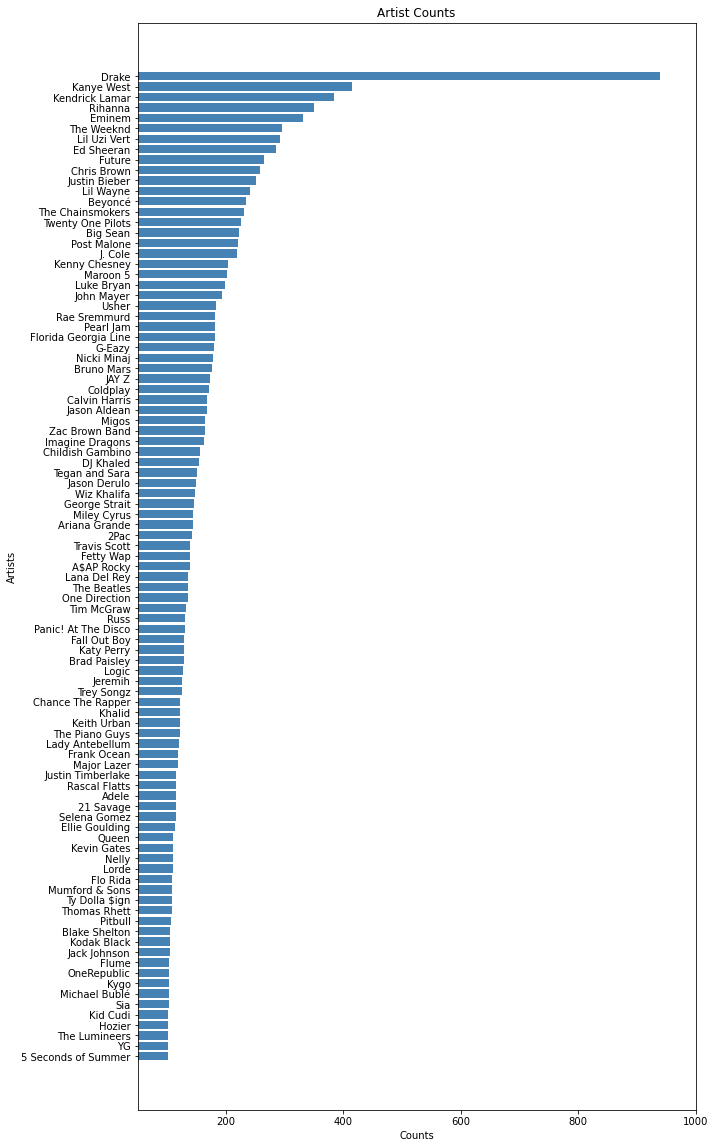

In [78]:
import matplotlib.pyplot as plt

# Extracting artists and counts from our counted list
artists, counts = zip(*counted_over_100)

fig, ax = plt.subplots(figsize=(10,20))
ax.barh(artists, counts, color='steelblue')
ax.set_xlabel('Counts')
ax.set_ylabel('Artists')
ax.set_title('Artist Counts')

plt.xlim(50, 1000)

# For better visualization
plt.gca().invert_yaxis()

plt.show()
